# Pymaceuticals Inc.
---

### Analysis


The bar graph shows that majority of the mice were tested with Capomulin (230 mice), next to Ramicane with 228 mice. Propriva had the least number of mice; 148. Female and male mice had roughly the same percentage; male at 51% and female at 49%. Overall, there was no preference over the other.   

Analyzing the box and whisker plot, we can see that Capomulin had majority of the data points lie within the box in comparison to the rest of the drugs. Majority of the final tumor volume were below the median. Ramicane can be somewhat comparable as being as effective, but it has a greater distribution of data.  

Analyzing the data for Mouse ID, I509, we can see that overall, the tumor volume did shrink over the course of the treatment. Once again demonstrating the effectiveness of the Capomulin. 

The correlation between mouse weight and the average tumor volume is 0.84. It shows that there is a somewhat of a positive correlation between the 2 factors. As the average weight of the mouse increases, so does the average tumor volume. The regression analysis demonstrates a predictive pattern. The more the mouse weighs, the likeliness that the tumor volume will be greater. 

Overall Capomulin demonstrated the be the most effective, however, it also did have the most amount of the mouse out of all the drug regimen. Both Ceftamin and Infubinol had 178 mice and both had somewhat of a similar result. Doing regression analysis or having more mice for those treatments, could have possibly resulted in similar outcome as Capomulin or provide confidence/further validation of the current analysis.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single DataFrame
Mouse = pd.merge(study_results, mouse_metadata, how= "left", on ="Mouse ID")

# Display the data table for preview
Mouse.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
Mouse['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
bool_series = Mouse.duplicated(["Mouse ID", "Timepoint"])
Mouse[bool_series]["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Mouse[Mouse['Mouse ID'] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Mouse.drop(Mouse[Mouse['Mouse ID'] == 'g989'].index, inplace= True)
Clean_Mouse = Mouse.copy()

Mouse["Tumor Volume (mm3)"] = Mouse["Tumor Volume (mm3)"].map("{:,.2f}".format)
Mouse.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.00,0,Capomulin,Female,9,22
1,f932,0,45.00,0,Ketapril,Male,15,29
2,g107,0,45.00,0,Ketapril,Female,2,29
3,a457,0,45.00,0,Ketapril,Female,11,30
4,c819,0,45.00,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
Mouse['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

DrugReg= Clean_Mouse.groupby(['Drug Regimen'])["Tumor Volume (mm3)"]


Means = DrugReg.mean()
Median = DrugReg.median()
St_dev = DrugReg.std()
Var = DrugReg.var()
St_error = DrugReg.sem()

# Assemble the resulting series into a single summary DataFrame.
Mouse_summary = pd.DataFrame({"Mean Tumor Volume":Means, 
                                "Median Tumor Volume": Median,
                              "Tumor Volume Variance":Var,
                               "Tumor Volume Std. Dev":St_dev,
                                "Tumor Volume Std. Err":St_error
                             })
Mouse_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
Clean_Mouse.groupby('Drug Regimen').agg({"Tumor Volume (mm3)":["mean", "median", "std", "var", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median       std        var       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  4.994774  24.947764  0.329346
Ceftamin              52.591172  51.776157  6.268188  39.290177  0.469821
Infubinol             52.884795  51.820584  6.567243  43.128684  0.492236
Ketapril              55.235638  53.698743  8.279709  68.553577  0.603860
Naftisol              54.331565  52.509285  8.134708  66.173479  0.596466
Placebo               54.033581  52.288934  7.821003  61.168083  0.581331
Propriva              52.320930  50.446266  6.622085  43.852013  0.544332
Ramicane              40.216745  40.673236  4.846308  23.486704  0.320955
Stelasyn              54.233149  52.431737  7.710419  59.450562  0.573111
Zoniferol             53.236507  51.818479  6.966589  48.533355  0.516398

## Bar and Pie Charts

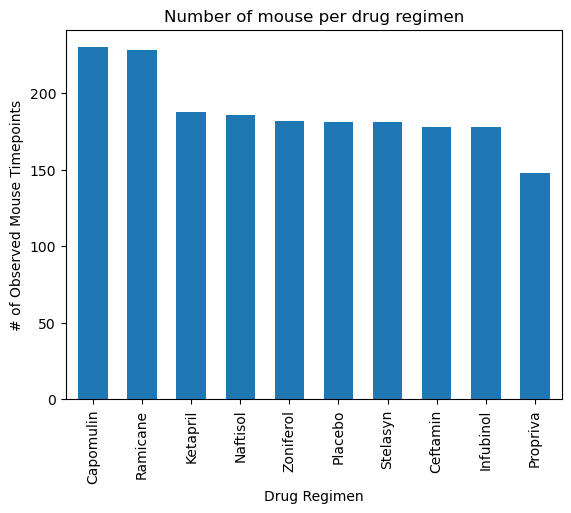

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Create Data Fram for Bar Graph
df_Count= Clean_Mouse.groupby(['Drug Regimen'])['Drug Regimen'].count().reset_index(name="count")
Bar_graph = df_Count.sort_values(['count'], ascending=False)

#Need to make a copy of the DataFrame in order to plot the bar graph using Pandas
Pandas = Bar_graph.copy()
Pandas.set_index('Drug Regimen', inplace = True)

#Generate Bar graph using .plot(kind =)
PBar = Pandas.plot(kind='bar', title = "Number of mouse per drug regimen", legend = False, width = .6)
PBar.set_ylabel("# of Observed Mouse Timepoints")
plt.show()


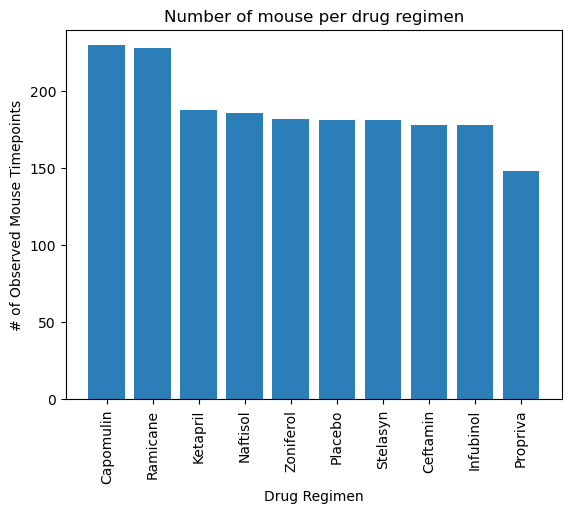

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = range(len(Bar_graph))
y_axis = Bar_graph['count']


plt.bar(x_axis, y_axis, align = "center", width = 0.8, alpha = 0.95 )
plt.ylim(0, max(y_axis) + 10) 

tick_locations = [value for value in  x_axis]
plt.xticks(tick_locations, Bar_graph["Drug Regimen"] , rotation="vertical")
        
plt.title("Number of mouse per drug regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

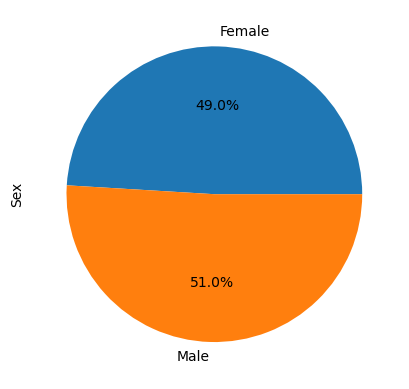

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
df_Gender= Clean_Mouse.groupby(['Sex'])['Sex'].count().reset_index(name="count")

Index =df_Gender.set_index('Sex')
pCircle = Index.plot(kind='pie', y = 'count', legend = False, autopct="%1.1f%%")
pCircle.set_ylabel("Sex")
plt.show()

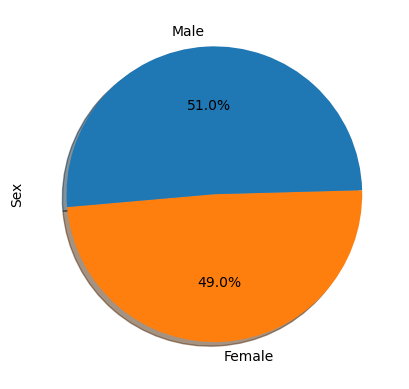

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(df_Gender['count'], labels=df_Gender['Sex'],colors=['C1', 'C0'],
        autopct="%1.1f%%", shadow=True, startangle=185)
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

Treatment = Clean_Mouse.groupby(['Mouse ID'])['Timepoint'].max()
Treatment

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Combined_Mouse = pd.merge(Treatment, Clean_Mouse, on = ["Mouse ID", "Timepoint"], how = "left")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

Volume = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for Regimen in Treatment:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    Tumor_volume = Combined_Mouse.loc[Combined_Mouse["Drug Regimen"] == Regimen, "Tumor Volume (mm3)"]
    
    # add subset 

    Volume.append(Tumor_volume)
    # Determine outliers using upper and lower bounds
    quartiles = Tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    Treatment_outliers = Tumor_volume.loc[(Tumor_volume < lower_bound) | (Tumor_volume > upper_bound)]
    print(f"For {Regimen}'s potential outliers: {Treatment_outliers}")

For Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
For Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
For Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


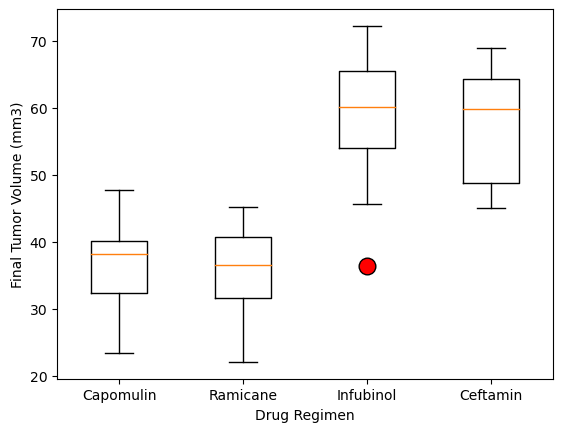

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax1=plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(Volume, labels=Treatment,flierprops=dict(markerfacecolor='r', markersize=12))
plt.show()


## Line and Scatter Plots

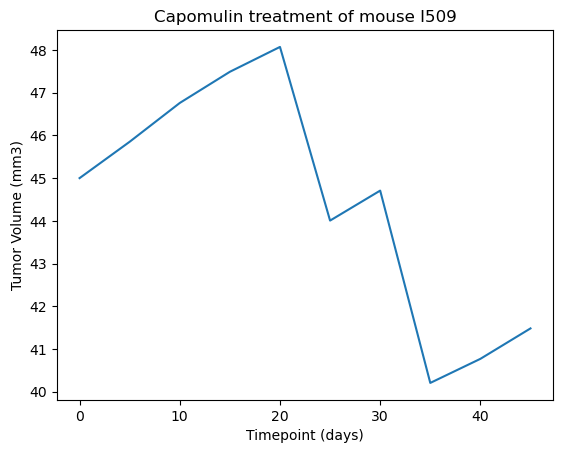

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = Clean_Mouse.loc[Clean_Mouse["Drug Regimen"] == 'Capomulin',:]
time = Capomulin_df.loc[(Capomulin_df["Mouse ID"] == "l509"), "Timepoint"]
volume = Capomulin_df.loc[(Capomulin_df["Mouse ID"] == "l509"), "Tumor Volume (mm3)"]

plt.plot(time, volume)
plt.title(f'Capomulin treatment of mouse I509')
plt.xlabel(f'Timepoint (days)')
plt.ylabel(f'Tumor Volume (mm3)')


plt.show()

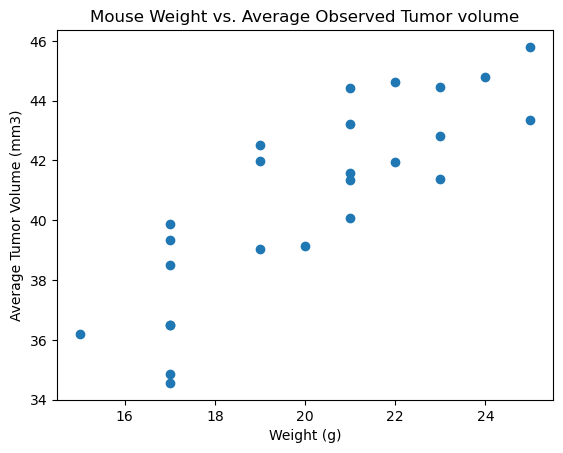

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Mouse_ID = Capomulin_df.groupby(['Mouse ID']).mean(numeric_only = True)

plt.scatter(Mouse_ID['Weight (g)'], Mouse_ID['Tumor Volume (mm3)'])
plt.title(f'Mouse Weight vs. Average Observed Tumor volume')
plt.ylabel(f'Average Tumor Volume (mm3)')
plt.xlabel(f'Weight (g)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


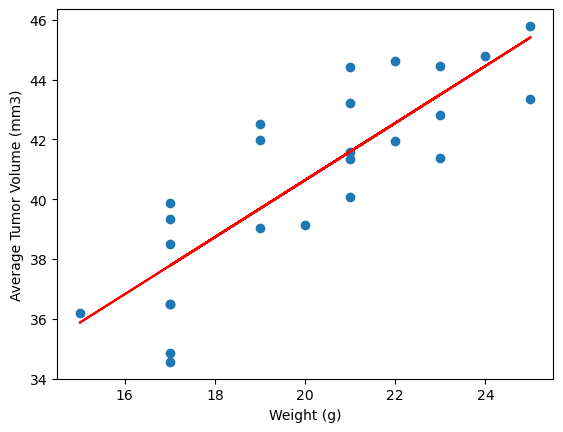

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_axis = Mouse_ID['Weight (g)']
y_axis = Mouse_ID['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_value = x_axis * slope + intercept
plt.scatter(x_axis, y_axis)
plt.plot(x_axis,regress_value,"r-")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_axis, y_axis)[0],2)}")
plt.show()